## Data Wrangling: Clean, Transform, Merge, Reshape

In [1]:
import pandas as pd

## Combining and merging data sets

### Database-style DataFrame merges

In [2]:
#Creación de los DataFrame
df1 = pd.DataFrame({'data1' : range(7), 'key' : list('bbacaab')})
df2 = pd.DataFrame({'data2' : range(20,23), 'key' : list('abd')})

In [3]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


By default, .merge() performs an [inner join](https://www.w3schools.com/sql/sql_join.asp) between the DataFrames, using the common columns as keys.


Explanation on JOINS:
https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins

<img src="https://i.stack.imgur.com/03hNZ.jpg">

In [5]:
df1.merge(df2) #Une con respecto a df1. Si no decimos la columna que tienen en común, 
#busca una similar para hacerlo y unir los datos en base a ella
#Se queda con los elementos en común que son "a" y "b", los elementos de "d" no aparecen.

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


In [7]:
df2.merge(df1) #Dará el mismo número de filas porque al ser inner join se queda con lo que ambos 
#tienen en común, sin "dominar" ninguno de los 2 DF

,data2,key,data1
0,20,a,2
1,20,a,4
2,20,a,5
3,21,b,0
4,21,b,1
5,21,b,6


That means that it returns the cartesian product of the elements with common keys: if there are duplicates, it will return all the possible combinations:

In [8]:
df2_wdups = pd.DataFrame({'data2' : range(20,24), 'key' : list('abda')})
df2_wdups

,data2,key
0,20,a
1,21,b
2,22,d
3,23,a


In [9]:
df1.merge(df2_wdups)
#Ahora al añadir una fila más con 23 y "a", aumentará en 3 el número de combinacioes posibles, 
#por lo que ahora pasamos de tener 6 a 9 filas diferentes.

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,2,a,23
5,4,a,20
6,4,a,23
7,5,a,20
8,5,a,23


If the columns to join on don't have the same name, or we want to join on the index of the DataFrames, we'll need to specify that.

In [21]:
df3 = pd.DataFrame({'data1' : range(7), 'lkey' : list('bbacaab')})
df4 = pd.DataFrame({'data2' : range(3), 'rkey' : list('abd')})
#Llamamos a la columna Key de manera diferente simplemente por diferenciarla, por lo que tendremos 
#que especificar qué columnas queremos usar para la unión
df3


,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [22]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [23]:
df3.merge(df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


## Comparing Joins

In [24]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [25]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


In [26]:
df1.merge(df2, how='inner')

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


In [27]:
df1.merge(df2, how='outer')
#Los valores que no están en uno de los 2 DFs les asigna el valor NaN

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,4.0,a,20.0
5,5.0,a,20.0
6,3.0,c,NaN
7,NaN,d,22.0


In [28]:
df1.merge(df2, how='left')
#Desaparece la "d" y el valor del DF2 para "c" será NaN porque no está en el DF2

,data1,key,data2
0,0,b,21.0
1,1,b,21.0
2,2,a,20.0
3,3,c,NaN
4,4,a,20.0
5,5,a,20.0
6,6,b,21.0


In [29]:
df1['X'] = 2
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [30]:
df2['X'] = 42
df2

,data2,key,X
0,20,a,42
1,21,b,42
2,22,d,42


If there are two columns with the same name that we do not join on, both will get transferred to the resulting DataFrame with a suffix. We can customize these suffixes.

In [34]:
df1.merge(df2,on='key')

,data1,key,X_x,data2,X_y
0,0,b,2,21,42
1,1,b,2,21,42
2,6,b,2,21,42
3,2,a,2,20,42
4,4,a,2,20,42
5,5,a,2,20,42


In [32]:
df1.merge(df2, on='key', suffixes=['_left', '_right'])
#Para editar el nombre de las columnas

,data1,key,X_left,data2,X_right
0,0,b,2,21,42
1,1,b,2,21,42
2,6,b,2,21,42
3,2,a,2,20,42
4,4,a,2,20,42
5,5,a,2,20,42


### Merging on index

In [35]:
df5= pd.DataFrame({'g': range(4), 'h': range(8,12)}, index =list('abcd'))
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


In [36]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [37]:
df1.merge(df5, left_on='key', right_index=True)
#Ahora no se añade ninguna columna extra ya que se usa como referencia los índices

,data1,key,X,g,h
0,0,b,2,1,9
1,1,b,2,1,9
6,6,b,2,1,9
2,2,a,2,0,8
4,4,a,2,0,8
5,5,a,2,0,8
3,3,c,2,2,10


### Concatenating along an axis

In [40]:
pd.concat([df1, df5])
#Simplemente une un DF al final del otro

/Users/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,X,data1,g,h,key
0,2.0,0.0,NaN,NaN,b
1,2.0,1.0,NaN,NaN,b
2,2.0,2.0,NaN,NaN,a
3,2.0,3.0,NaN,NaN,c
4,2.0,4.0,NaN,NaN,a
5,2.0,5.0,NaN,NaN,a
6,2.0,6.0,NaN,NaN,b
a,NaN,NaN,0.0,8.0,NaN
b,NaN,NaN,1.0,9.0,NaN
c,NaN,NaN,2.0,10.0,NaN


What is happenning in the above example!?

Lets concatenate more...

In [41]:
import numpy as np

a1 = np.arange(0,24).reshape(4,6)
a1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [42]:
a2 = np.arange(25,37).reshape(4,3)
a2

array([[25, 26, 27],
       [28, 29, 30],
       [31, 32, 33],
       [34, 35, 36]])

In [43]:
a3 = np.concatenate([a1,a2], axis=1)
a3
#Indicamos las matrices que queremos concatenar y al poner Axis = 1 concatena a la derecha, concatena en columnas

array([[ 0,  1,  2,  3,  4,  5, 25, 26, 27],
       [ 6,  7,  8,  9, 10, 11, 28, 29, 30],
       [12, 13, 14, 15, 16, 17, 31, 32, 33],
       [18, 19, 20, 21, 22, 23, 34, 35, 36]])

In [46]:
s1 = pd.Series(range(4), index=list('abcd'))
s2 = pd.Series(range(10,13), index=list('lmn'))
s3 = pd.Series(range(40,43), index=list('xyz'))
s1,s2,s3

(a    0
 b    1
 c    2
 d    3
 dtype: int64, l    10
 m    11
 n    12
 dtype: int64, x    40
 y    41
 z    42
 dtype: int64)

In [47]:
pd.concat([s1,s2,s3])
#Sería el equivalente a Axis=0, que sería añadiendo filas una detrás de otra

a     0
b     1
c     2
d     3
l    10
m    11
n    12
x    40
y    41
z    42
dtype: int64

In [48]:
result = pd.concat([s1,s2,s3], axis=1)
result
#Ahora como son series se añadirían las columnas a la derecha, pero los valores de las filas donde 
#no hay index similar serán NaN

/Users/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


In [49]:
result = pd.concat([s1,s2,s3], axis=1, keys=['s1', 's2', 's3'])
result

/Users/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,s1,s2,s3
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


In [52]:
pd.concat([df1,df2])

/Users/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,X,data1,data2,key
0,2,0.0,NaN,b
1,2,1.0,NaN,b
2,2,2.0,NaN,a
3,2,3.0,NaN,c
4,2,4.0,NaN,a
5,2,5.0,NaN,a
6,2,6.0,NaN,b
0,42,NaN,20.0,a
1,42,NaN,21.0,b
2,42,NaN,22.0,d


In [53]:
pd.concat([df1,df2], ignore_index=True)
#Con el ignore crea índices nuevos que no se repitan y en un nuevo orden

/Users/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,X,data1,data2,key
0,2,0.0,NaN,b
1,2,1.0,NaN,b
2,2,2.0,NaN,a
3,2,3.0,NaN,c
4,2,4.0,NaN,a
5,2,5.0,NaN,a
6,2,6.0,NaN,b
7,42,NaN,20.0,a
8,42,NaN,21.0,b
9,42,NaN,22.0,d


#### Digression

Attention! Be careful not to reassign to reserved words or functions- you will overwrite the variable.

In [ ]:
pd.concat = df1
#Asignamos el valor de df1 a la función concat por lo que nos la cargamos y ya no realiza su función.

In [ ]:
pd.concat([s1,s2])

You can delete the overwritten variable, but you won't get back the original value. If it is an object or function from a module, you'll need to reload() the module, since Python doesn't load again an already imported module if you try to import it. reload() is useful also when you are actively developing your own module and want to load the latest definition of a function into memory.

In [ ]:
del(pd.concat)

In [ ]:
pd.concat

In [ ]:
import imp
imp.reload(pd)
#Carga de nuevo el módulo py 

In [ ]:
pd.concat

## Data transformation

### Removing duplicates

In [54]:
df6 = pd.DataFrame({'key1' : ['one'] * 3 + ['two'] * 4,
                    'key2' : [1, 1, 2, 3, 3, 4, 4]})
df6

,key1,key2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [55]:
df6.duplicated()
#Siempre se quedará con el primer valor, si se repite ese valor más adelante indicará que está repetido

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [56]:
df6.drop_duplicates()

,key1,key2
0,one,1
2,one,2
3,two,3
5,two,4


In [57]:
df6.drop_duplicates(keep='last')

,key1,key2
1,one,1
2,one,2
4,two,3
6,two,4


### Renaming axis indexes

In [58]:
df6.index = list('plfjdmh')
df6

,key1,key2
p,one,1
l,one,1
f,one,2
j,two,3
d,two,3
m,two,4
h,two,4


### Discretization and binning

In [59]:
ages = [18, 25, 22, 45, 91, 67, 20, 38, 38, 56]

In [60]:
bins = [18, 25, 35, 65, 100]

cuts = pd.cut(ages, bins) #Cortamos la lista "ages" siguiendo el patrón de "bins"
cuts.value_counts() #Muestra la cuenta de valores pero se come el valor 18 que no está incluido


(18, 25]     3
(25, 35]     0
(35, 65]     4
(65, 100]    2
dtype: int64

In [61]:
cuts = pd.cut(ages, bins, right= False) #Así ya entra el 25 en el segundo rango y el 18 entra
cuts.value_counts()

[18, 25)     3
[25, 35)     1
[35, 65)     4
[65, 100)    2
dtype: int64

In [62]:
points = [3,1,4,2]

In [63]:
import matplotlib.pyplot as plt

plt.bar(bins[0:-1],points) #El último valor de bins que es 100 no entrará porque sino no deja por el número 
#de valores que debe ser igual, pero será incorrecto el gráfico.

<BarContainer object of 4 artists>

(array([3., 1., 4., 2.]),
 array([ 18,  25,  35,  65, 100]),
 <a list of 4 Patch objects>)

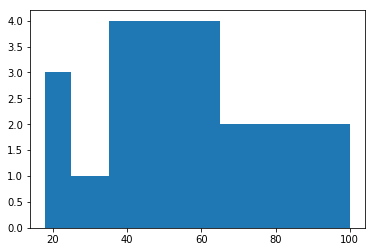

In [64]:
plt.hist(ages, bins = bins) #Hacer un histograma con matplot indicando los bins

## String manipulation

### String object methods

In [65]:
string = 'this is some sentence'
string.split()

['this', 'is', 'some', 'sentence']

### Vectorized string functions in pandas

[Vectorized string functions in pandas](https://pandas.pydata.org/pandas-docs/stable/text.html) are grouped within the .str attribute of Series and Indexes. They have the same names as the regular Python string functions, but work on Series of strings.

In [66]:
animals = 'rhino giraffe molerat mantisshrimp cheetah mosquito whale'.split()
animals

['rhino', 'giraffe', 'molerat', 'mantisshrimp', 'cheetah', 'mosquito', 'whale']

In [68]:
list(map(lambda x: x.capitalize(), animals)) 
#La función que quiero aplicar a cada uno de los elementos (capitalize) y el objeto al que quiero 
#aplicarle esa función
#El list es sólo para que Python lo muestre por pantalla, únicamente con map no lo muestra

['Rhino', 'Giraffe', 'Molerat', 'Mantisshrimp', 'Cheetah', 'Mosquito', 'Whale']

In [69]:
list(map(lambda x: x.capitalize().strip(), animals)) 
#Con el strip nos aseguramos de que no haya ningún espacio en blanco 

['Rhino', 'Giraffe', 'Molerat', 'Mantisshrimp', 'Cheetah', 'Mosquito', 'Whale']

In [70]:
df1['animal'] = animals
df1

,data1,key,X,animal
0,0,b,2,rhino
1,1,b,2,giraffe
2,2,a,2,molerat
3,3,c,2,mantisshrimp
4,4,a,2,cheetah
5,5,a,2,mosquito
6,6,b,2,whale


In [71]:
animals_series = df1['animal']
animals_series.str
#Como ahora trabajamos con series tenemos que añadir el .str, ahora no será necesario hacer una función lambda, 
#simplemente .str y la función que queremos aplicar
#Pandas incorpora muchos métodos para aplicar a los strings, no será necesario usar lambda

In [72]:
animals_series.str.upper()

0           RHINO
1         GIRAFFE
2         MOLERAT
3    MANTISSHRIMP
4         CHEETAH
5        MOSQUITO
6           WHALE
Name: animal, dtype: object

In [73]:
animals_series.str.len()

0     5
1     7
2     7
3    12
4     7
5     8
6     5
Name: animal, dtype: int64

In [74]:
animals_series.str.count('o')

0    1
1    0
2    1
3    0
4    0
5    2
6    0
Name: animal, dtype: int64

In [75]:
animals_series.str.contains('m')

0    False
1    False
2     True
3     True
4    False
5     True
6    False
Name: animal, dtype: bool

In [76]:
df1[animals_series.str.contains('m')]

,data1,key,X,animal
2,2,a,2,molerat
3,3,c,2,mantisshrimp
5,5,a,2,mosquito


In [77]:
series_with_blanks = pd.Series(['SDF    ', ' RTTR     ', 'BL   '])
series_with_blanks

0       SDF    
1     RTTR     
2         BL   
dtype: object

In [80]:
series_with_blanks.str.rstrip()
#Elimina los espacios en blanco

0      SDF
1     RTTR
2       BL
dtype: object

In [ ]:
Ejercicio: Cambiar la columna animals para que sean los animales en mayúsculas

In [82]:
df1['animal'] = df1['animal'].str.upper()

In [83]:
df1

,data1,key,X,animal
0,0,b,2,RHINO
1,1,b,2,GIRAFFE
2,2,a,2,MOLERAT
3,3,c,2,MANTISSHRIMP
4,4,a,2,CHEETAH
5,5,a,2,MOSQUITO
6,6,b,2,WHALE
